In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df = pd.read_csv('L1_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,1,2024-01-01 06:31:08.000,0.0,1016.50,17.5,86.8,25.00,0.0
1,1,2024-01-01 06:32:08.000,0.0,1016.53,17.5,86.7,28.33,0.0
2,1,2024-01-01 06:33:08.000,0.0,1016.57,17.5,86.7,32.50,0.0
3,1,2024-01-01 06:34:08.000,0.0,1016.58,17.5,86.7,39.17,0.0
4,1,2024-01-01 06:35:08.000,0.0,1016.59,17.5,86.7,45.83,0.0
...,...,...,...,...,...,...,...,...
101668,1,2024-07-24 18:17:07.000,0.0,959.80,25.1,100.0,23.33,0.0
101669,1,2024-07-24 18:18:07.000,0.0,959.92,25.1,100.0,23.33,0.0
101670,1,2024-07-24 18:19:07.000,0.0,960.09,25.1,100.0,33.33,0.0
101671,1,2024-07-24 18:20:07.000,0.0,959.40,25.1,100.0,40.00,0.0


In [3]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,101673.0,101673.000000,101673.000000,101673.000000,101673.000000,101673.000000,101673.000000
mean,1.0,0.297305,1008.546454,30.261133,73.025531,25773.275297,279.332067
std,0.0,0.783864,55.869739,9.809827,25.826234,29399.684979,479.481327
min,1.0,0.000000,958.150000,2.000000,18.900000,20.000000,0.000000
25%,1.0,0.000000,1003.480000,22.500000,48.300000,4067.500000,3.880000
50%,1.0,0.000000,1007.350000,29.000000,75.900000,13659.170000,39.280000
75%,1.0,0.000000,1013.070000,37.800000,100.000000,36855.700000,279.810000
max,1.0,8.880000,9014.550000,61.800000,300.000000,117758.200000,2598.450000


In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
968,1,2024-01-02 11:35:04.000,0.0000,1012.47,37.2,29.5,117758.2,1771.11
970,1,2024-01-02 11:37:04.000,2.2316,1012.42,37.6,29.8,117758.2,1772.68
971,1,2024-01-02 11:38:04.000,0.0000,1012.40,37.8,29.9,117758.2,1756.16
972,1,2024-01-02 11:39:04.000,0.0000,1012.38,38.0,29.8,117758.2,1785.08
973,1,2024-01-02 11:40:04.000,0.0000,1012.36,38.3,28.7,117758.2,1759.77
...,...,...,...,...,...,...,...,...
71929,1,2024-05-30 11:10:21.000,0.0000,1003.34,43.5,43.5,117758.2,1335.60
71930,1,2024-05-30 11:11:21.000,0.0000,1003.35,44.1,43.1,117758.2,1528.16
75825,1,2024-06-05 11:16:36.000,0.0000,1007.42,45.9,26.6,117758.2,1211.85
75859,1,2024-06-05 11:50:36.000,0.0000,1007.16,42.6,32.4,117758.2,1310.69


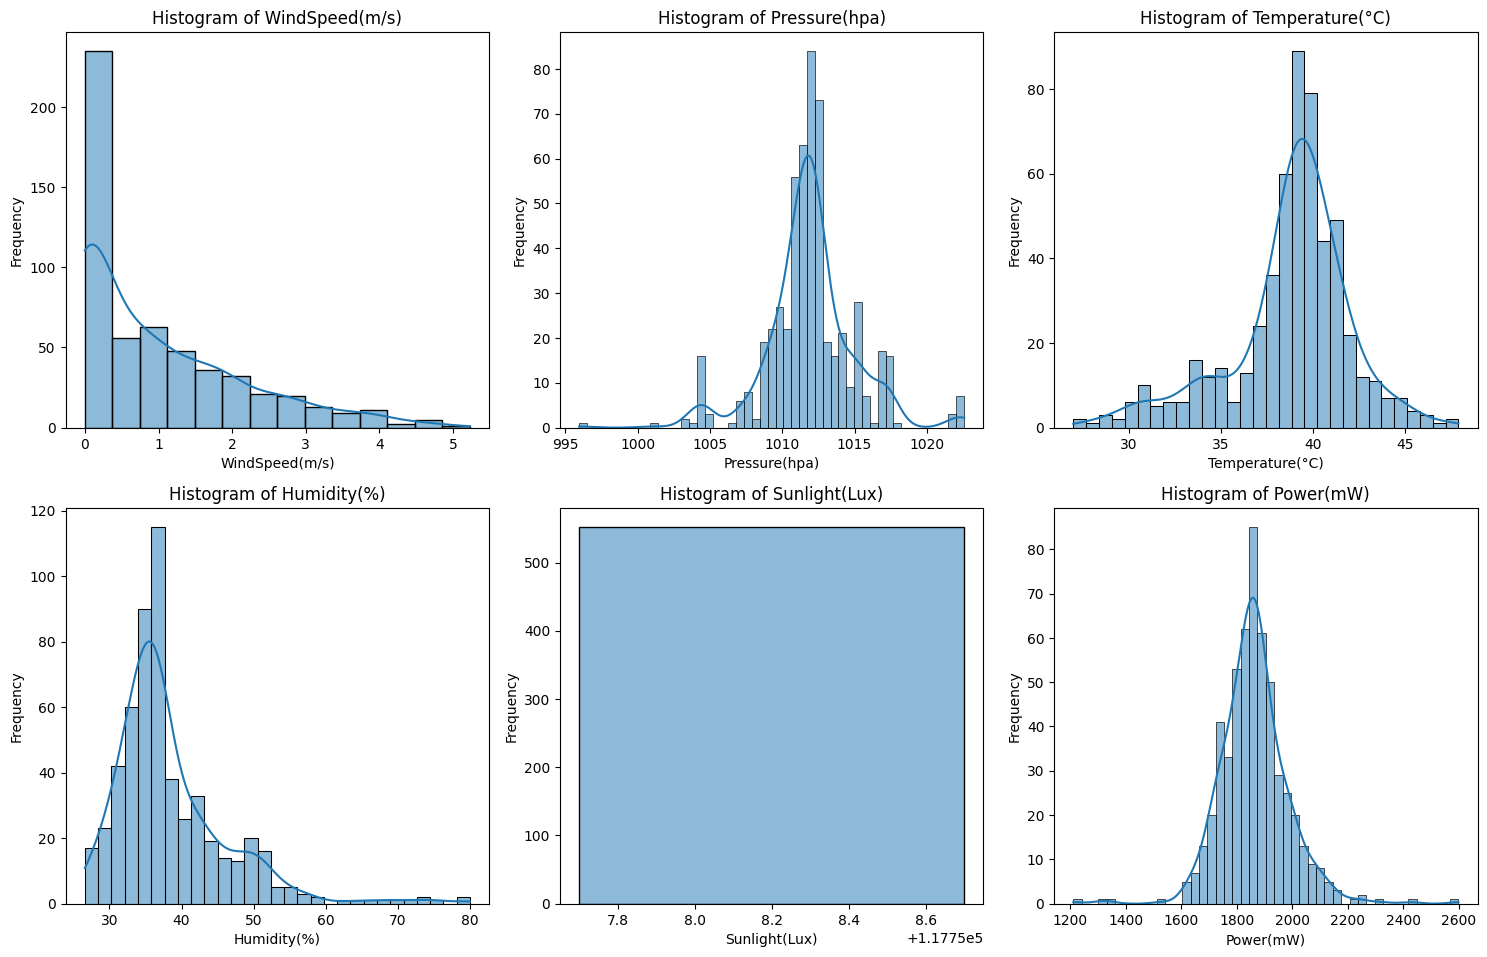

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0155 * Sunlight(Lux) + -121.5769


In [ ]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0155
intercept = -121.5769

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [11]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,101673.0,101673.000000,101673.000000,101673.000000,101673.000000,101673.000000,101673.000000
mean,1.0,0.297305,1008.546454,30.261133,73.025531,25829.085477,279.332067
std,0.0,0.783864,55.869739,9.809827,25.826234,29589.248465,479.481327
min,1.0,0.000000,958.150000,2.000000,18.900000,20.000000,0.000000
25%,1.0,0.000000,1003.480000,22.500000,48.300000,4067.500000,3.880000
50%,1.0,0.000000,1007.350000,29.000000,75.900000,13659.170000,39.280000
75%,1.0,0.000000,1013.070000,37.800000,100.000000,36855.700000,279.810000
max,1.0,8.880000,9014.550000,61.800000,300.000000,175485.606452,2598.450000


In [ ]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [ ]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240101063101,0.0,1016.54,17.50,86.79,55.17,0.00
1,20240101064101,0.0,1016.60,17.49,86.80,178.33,0.02
2,20240101065101,0.0,1016.66,17.50,86.95,343.25,0.05
3,20240101070101,0.0,1016.73,17.50,87.00,486.33,0.09
4,20240101071101,0.0,1016.78,17.58,86.94,683.92,0.15
...,...,...,...,...,...,...,...
10163,20240724173901,0.0,961.18,25.24,100.00,97.92,0.00
10164,20240724174901,0.0,961.16,24.94,100.00,54.50,0.00
10165,20240724175901,0.0,960.90,24.77,100.00,36.42,0.00
10166,20240724180901,0.0,959.98,24.93,100.00,42.33,0.00


# HEATMAP

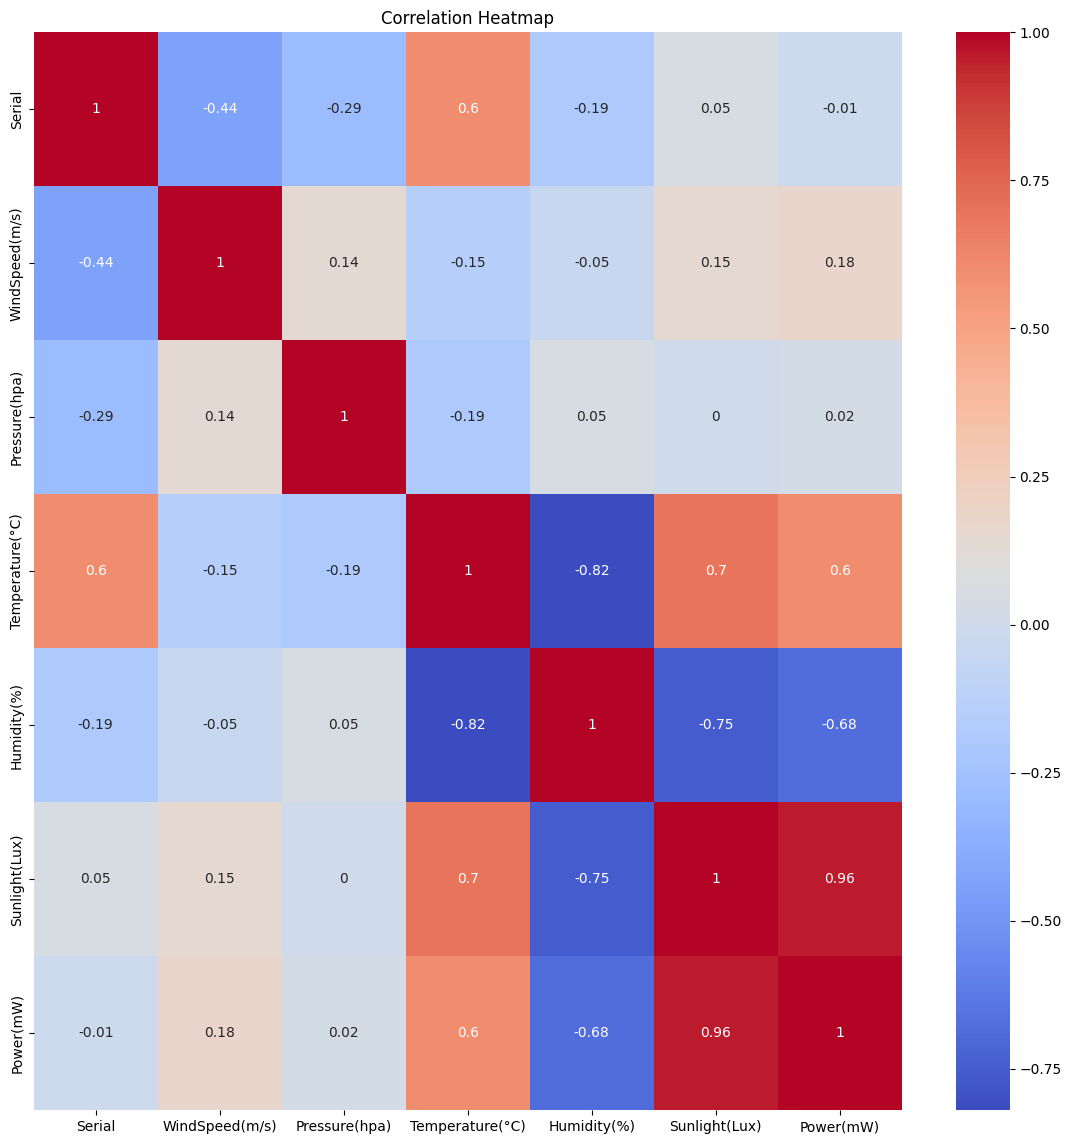

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.960907
Humidity(%)        0.678769
Temperature(°C)    0.598414
WindSpeed(m/s)     0.179063
Pressure(hpa)      0.021209
Serial             0.005175
Name: Power(mW), dtype: float64

In [17]:
df.to_csv('L1_Train_Revise.csv', index=False)